**1. Implement K Nearest Neighbor classifier in Python.**

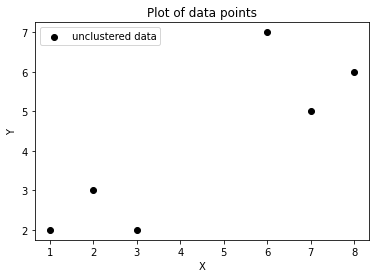

red


In [27]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = [[1,2, 'black'],
            [2,3, 'black'],
            [3,2, 'black'],
            [7,5, 'red'],
            [6,7, 'red'],
            [8,6, 'red']]

data=[]

for i in dataset:
  temp=(i[0],i[1])
  data.append(temp)

data=pd.DataFrame(data, columns = ['X','Y'])
X = data.iloc[:,:].values

test = [6,8]

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Plot of data points')
plt.show()



def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


def Get_Neighbors(train, test_row, num):
    distance = list()  # []
    data = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:num]
    return neighbors

def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction
prediction = predict_classification(dataset, test, 5)
print(prediction)


**2. Implement K Means Clustering algorithm in Python.**

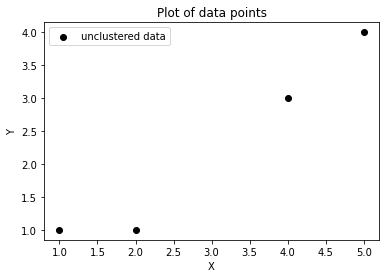

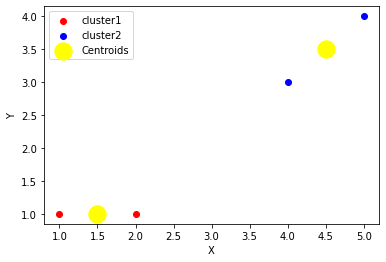

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm

dataset=[(1,1),(2,1),(4,3),(5,4)]
dataset=pd.DataFrame (dataset, columns = ['X','Y'])
X = dataset.iloc[:,:].values

K=2
m=4
Centroids=np.array([]).reshape(2,0)

#step 1
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    

#step2
num_iter=5
Output=defaultdict()
Output={}
for n in range(num_iter):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    Output=Y

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Plot of data points')
plt.show()

#color=['red','blue','green','cyan','magenta']
#labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()